# Checking the distribution of variables and the correlation between each of the variables and team size

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [ ]:
# load the dataset
df = pd.read_csv('./refined.csv')

In [20]:
df['gh_project_name'].nunique()

1034

In [2]:
team_size = df.gh_team_size.unique()

In [3]:
# code changes
test_diff_ratio = np.array(df.groupby('gh_team_size', as_index=False)['test_diff_ratio'].mean()['test_diff_ratio'].tolist(), dtype=np.float)
src_diff_ratio = np.array(df.groupby('gh_team_size', as_index=False)['src_diff_ratio'].mean()['src_diff_ratio'].tolist(), dtype=np.float)

# tests
test_failed_ratio = np.array(df.groupby('gh_team_size', as_index=False)['test_failed_ratio'].mean()['test_failed_ratio'].tolist(), dtype=np.float)
test_ok_ratio = np.array(df.groupby('gh_team_size', as_index=False)['test_ok_ratio'].mean()['test_ok_ratio'].tolist(), dtype=np.float)

# date
date_diff = np.array(df.groupby('gh_team_size', as_index=False)['date_diff'].mean()['date_diff'].tolist(), dtype=np.float)
src_date = np.array(df.groupby('gh_team_size', as_index=False)['src_date'].mean()['src_date'].tolist(), dtype=np.float)
test_date = np.array(df.groupby('gh_team_size', as_index=False)['test_date'].mean()['test_date'].tolist(), dtype=np.float)

# Travis status
counts = df.groupby(['gh_team_size']).size().reset_index(name='counts')
failed = np.array(df.groupby(['gh_team_size']).tr_status.value_counts().unstack(fill_value=0).loc[:, 0].tolist(), dtype=np.float)
passed = np.array(df.groupby(['gh_team_size']).tr_status.value_counts().unstack(fill_value=0).loc[:, 1].tolist(), dtype=np.float)
total_status = np.array(list(counts['counts']), dtype=np.float)

In [18]:
if not os.path.exists('figs'):
    os.makedirs('figs')

### Distribution of variables

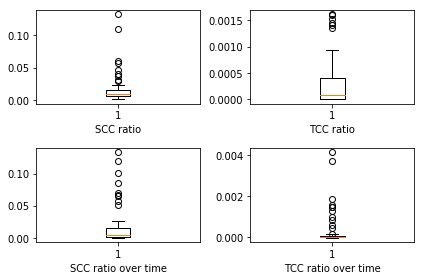

In [19]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].boxplot(src_diff_ratio)
ax[0, 1].boxplot(test_diff_ratio)
ax[1, 0].boxplot(src_date)
ax[1, 1].boxplot(test_date)

ax[0, 0].set_xlabel('SCC ratio')
ax[0, 1].set_xlabel('TCC ratio')
ax[1, 0].set_xlabel('SCC ratio over time')
ax[1, 1].set_xlabel('TCC ratio over time')

plt.tight_layout(w_pad=0.5, h_pad=1.0)
plt.savefig('./figs/code_dist.eps', format='eps')

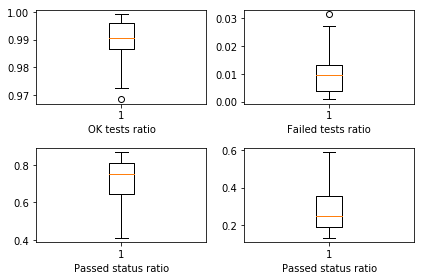

In [17]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].boxplot(test_ok_ratio)
ax[0, 1].boxplot(test_failed_ratio)
ax[1, 0].boxplot(passed/total_status)
ax[1, 1].boxplot(failed/total_status)

ax[0, 0].set_xlabel('OK tests ratio')
ax[0, 1].set_xlabel('Failed tests ratio')
ax[1, 0].set_xlabel('Passed status ratio')
ax[1, 1].set_xlabel('Passed status ratio')
plt.tight_layout(w_pad=0.5, h_pad=1.0)
plt.savefig('./figs/rest_dist.eps', format='eps')

### Correlation between team size and other variables

In [4]:
stats.spearmanr(team_size, src_diff_ratio)
# correlation

SpearmanrResult(correlation=-0.9069185884968048, pvalue=1.931503088724296e-23)

In [5]:
stats.spearmanr(team_size, test_diff_ratio)
# correlation

SpearmanrResult(correlation=-0.891858849680467, pvalue=1.2070545478241052e-21)

In [6]:
stats.spearmanr(team_size, test_ok_ratio)
# no correlation

SpearmanrResult(correlation=0.09947207557654905, pvalue=0.4495429036597496)

In [7]:
stats.spearmanr(team_size, test_failed_ratio)
# no correlation

SpearmanrResult(correlation=-0.09947207557654905, pvalue=0.4495429036597496)

In [9]:
stats.spearmanr(team_size, src_date)
# fair correlation

SpearmanrResult(correlation=-0.7769380383439847, pvalue=2.9388017605642834e-13)

In [10]:
stats.spearmanr(team_size, test_date)
# correlation

SpearmanrResult(correlation=-0.8042233953876078, pvalue=1.0059803050721419e-14)

In [11]:
stats.spearmanr(team_size, failed/total_status)
# no correlation

SpearmanrResult(correlation=0.574103917754932, pvalue=1.6197959566216812e-06)

In [12]:
stats.spearmanr(team_size, passed/total_status)
# no correlation

SpearmanrResult(correlation=-0.574103917754932, pvalue=1.6197959566216812e-06)